<a href="https://colab.research.google.com/github/om051105/Python/blob/main/modal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install kagglehub tensorflow


In [13]:
import kagglehub

path = kagglehub.dataset_download("noulam/tomato")
print("Dataset downloaded to:", path)


100%|██████████| 743M/743M [00:26<00:00, 29.0MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/noulam/tomato/versions/1


In [14]:
import os

os.listdir(path)


['new plant diseases dataset(augmented)',
 'New Plant Diseases Dataset(Augmented)']

In [15]:
import os

base1 = os.path.join(path, "New Plant Diseases Dataset(Augmented)")
base2 = os.path.join(path, "new plant diseases dataset(augmented)")

print("Base1 exists:", os.path.exists(base1))
print("Base2 exists:", os.path.exists(base2))

print("Base1 contents:", os.listdir(base1))
print("Base2 contents:", os.listdir(base2))


Base1 exists: True
Base2 exists: True
Base1 contents: ['valid', 'train']
Base2 contents: ['New Plant Diseases Dataset(Augmented)']


In [16]:
BASE_DIR = os.path.join(path, "New Plant Diseases Dataset(Augmented)")


In [17]:
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VALID_DIR = os.path.join(BASE_DIR, "valid")

print("Train dir:", TRAIN_DIR)
print("Valid dir:", VALID_DIR)
print("Train classes:", os.listdir(TRAIN_DIR))


Train dir: /root/.cache/kagglehub/datasets/noulam/tomato/versions/1/New Plant Diseases Dataset(Augmented)/train
Valid dir: /root/.cache/kagglehub/datasets/noulam/tomato/versions/1/New Plant Diseases Dataset(Augmented)/valid
Train classes: ['Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Tomato___Target_Spot', 'Tomato___healthy', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot']


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(
    rescale=1./255
)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [19]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(train_data.num_classes, activation="softmax")
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [21]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 236s 398ms/step - accuracy: 0.4423 - loss: 1.8359 - val_accuracy: 0.6824 - val_loss: 1.0670
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 223s 389ms/step - accuracy: 0.8090 - loss: 0.5505 - val_accuracy: 0.7917 - val_loss: 0.7194
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 225s 392ms/step - accuracy: 0.8860 - loss: 0.3454 - val_accuracy: 0.8445 - val_loss: 0.4686
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 228s 397ms/step - accuracy: 0.9030 - loss: 0.2730 - val_accuracy: 0.8643 - val_loss: 0.4858
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 223s 387ms/step - accuracy: 0.9205 - loss: 0.2278 - val_accuracy: 0.8301 - val_loss: 0.6409
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 222s 387ms/step - accuracy: 0.9253 - loss: 0.2165 - val_accuracy: 0.8805 - val_loss: 0.4077
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 224s 390ms/step - accuracy: 0.9309 - loss: 0.2005 - val_accuracy: 0.8718 - val_loss: 0.4073
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 260s 387ms/step - accuracy: 0.9393 -

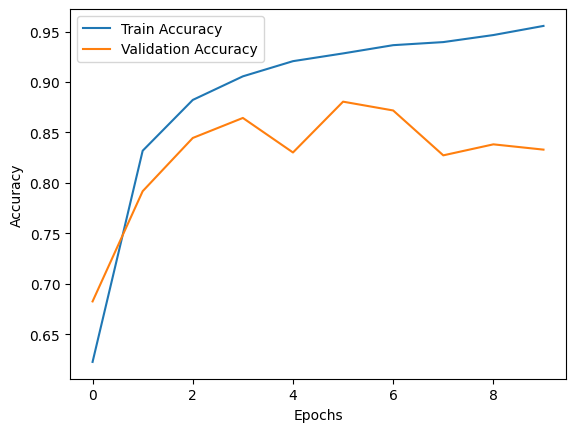

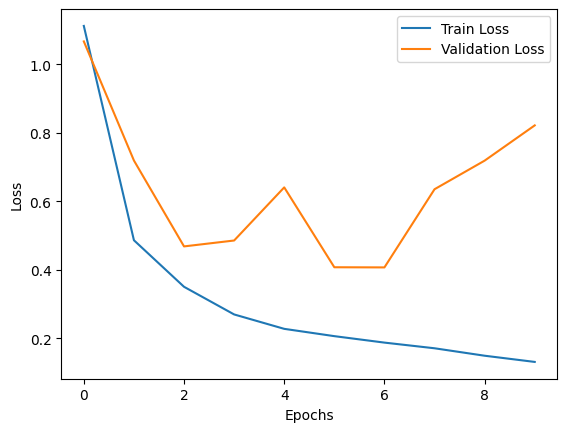

In [22]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [23]:
model.save("tomato_cnn_baseline.h5")
print("Baseline CNN model saved")


Baseline CNN model saved


In [1]:
from google.colab import files
files.download("tomato_cnn_baseline.h5")


FileNotFoundError: Cannot find file: tomato_cnn_baseline.h5